Проект, который нужно сделать

Парсинг ЦИАНа

Загрузить как можно большее кол-во данных из описания квартиры, в том числе текстовую информацию.
Выгрузить минимум 1500 объявлений.

Совет - после каждой скачанной квартиры сохранять данные сразу (в файл или базу)
если 4 ядра - то можно распараллелить

Из выгруженного пробуем делать факторы.
По полученным данным предсказать стоимость квартиры.

Какие задачи можно решить используя наш проект (практическое применение)
1. не видим цену - предсказать ее
2. видим цену - сравним ее с моделью

Важно понимать, что цены плавают. В нашей задаче мы не моделируем временной интервал


====
Срок - 1 августа - загрузить данные


In [1]:
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


In [2]:
names = []
with open('communities.names') as inf:
    for row in inf:
        if row.startswith('@attribute'):
            col = row.strip().split()[1] # @attribute PctPolicMinor numeric - мы получаем список и берем элемент 1, то есть PctPolicMinor
            names.append(col)

In [3]:
names

['state',
 'county',
 'community',
 'communityname',
 'fold',
 'population',
 'householdsize',
 'racepctblack',
 'racePctWhite',
 'racePctAsian',
 'racePctHisp',
 'agePct12t21',
 'agePct12t29',
 'agePct16t24',
 'agePct65up',
 'numbUrban',
 'pctUrban',
 'medIncome',
 'pctWWage',
 'pctWFarmSelf',
 'pctWInvInc',
 'pctWSocSec',
 'pctWPubAsst',
 'pctWRetire',
 'medFamInc',
 'perCapInc',
 'whitePerCap',
 'blackPerCap',
 'indianPerCap',
 'AsianPerCap',
 'OtherPerCap',
 'HispPerCap',
 'NumUnderPov',
 'PctPopUnderPov',
 'PctLess9thGrade',
 'PctNotHSGrad',
 'PctBSorMore',
 'PctUnemployed',
 'PctEmploy',
 'PctEmplManu',
 'PctEmplProfServ',
 'PctOccupManu',
 'PctOccupMgmtProf',
 'MalePctDivorce',
 'MalePctNevMarr',
 'FemalePctDiv',
 'TotalPctDiv',
 'PersPerFam',
 'PctFam2Par',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctWorkMomYoungKids',
 'PctWorkMom',
 'NumIlleg',
 'PctIlleg',
 'NumImmig',
 'PctImmigRecent',
 'PctImmigRec5',
 'PctImmigRec8',
 'PctImmigRec10',
 'PctRecentImmig',
 'P

In [4]:
df = pd.read_csv('communities.data', names=names)

In [5]:
df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 128 entries, state to ViolentCrimesPerPop
dtypes: float64(100), int64(2), object(26)
memory usage: 1.9+ MB


In [7]:
df.replace(to_replace='?', value=np.nan, inplace=True)

In [8]:
df.isna().sum()

state                      0
county                  1174
community               1177
communityname              0
fold                       0
population                 0
householdsize              0
racepctblack               0
racePctWhite               0
racePctAsian               0
racePctHisp                0
agePct12t21                0
agePct12t29                0
agePct16t24                0
agePct65up                 0
numbUrban                  0
pctUrban                   0
medIncome                  0
pctWWage                   0
pctWFarmSelf               0
pctWInvInc                 0
pctWSocSec                 0
pctWPubAsst                0
pctWRetire                 0
medFamInc                  0
perCapInc                  0
whitePerCap                0
blackPerCap                0
indianPerCap               0
AsianPerCap                0
                        ... 
PctSameHouse85             0
PctSameCity85              0
PctSameState85             0
LemasSwornFT  

In [9]:
df.dtypes

state                     int64
county                   object
community                object
communityname            object
fold                      int64
population              float64
householdsize           float64
racepctblack            float64
racePctWhite            float64
racePctAsian            float64
racePctHisp             float64
agePct12t21             float64
agePct12t29             float64
agePct16t24             float64
agePct65up              float64
numbUrban               float64
pctUrban                float64
medIncome               float64
pctWWage                float64
pctWFarmSelf            float64
pctWInvInc              float64
pctWSocSec              float64
pctWPubAsst             float64
pctWRetire              float64
medFamInc               float64
perCapInc               float64
whitePerCap             float64
blackPerCap             float64
indianPerCap            float64
AsianPerCap             float64
                         ...   
PctSameH

In [10]:
df['LemasGangUnitDeploy'].value_counts() 

0      126
0.5    105
1       88
Name: LemasGangUnitDeploy, dtype: int64

### Типы признаков

любую задачу обучения мы сводим к табличке факторы - таргет (целевой параметр - то, что предсказывают)
факторы = фичи = признаки = атрибуты

#### 3 типа признаков

1. Категориальные - пол, город, район, место работы (компания). 
Над ними не применимы никакие операции (кроме строгого равенства)

2. Порядковые - образование (среднее, высшее и т д ), ребенок-взрослый и т. д., оценки 
Не применимы арифметические операции, но применимы операции сравнения
двойка + тройка  не равно пятерка, поэтому признак оценки - порядковый, а не непрерывный

3. Непрерывные - 
Применимы все операции. Чаще всего они типа float
площадь, температура и т д 

#### Таргет может быть тоже разного типа
1. непрервный
2. категориальный

Обучение с учителем делится на 2 типа: 
1) Регрессионный анализ - для непрерывного типа
2) Классификация - используем алгоритмы, которые классифицирует.


Купил или не купил - это классификацмия

А регрессия - это всегда число (кол-во убытков)









In [11]:
# оставляем только непрерывные признаки

In [12]:
list(df.isna().sum().items())

[('state', 0),
 ('county', 1174),
 ('community', 1177),
 ('communityname', 0),
 ('fold', 0),
 ('population', 0),
 ('householdsize', 0),
 ('racepctblack', 0),
 ('racePctWhite', 0),
 ('racePctAsian', 0),
 ('racePctHisp', 0),
 ('agePct12t21', 0),
 ('agePct12t29', 0),
 ('agePct16t24', 0),
 ('agePct65up', 0),
 ('numbUrban', 0),
 ('pctUrban', 0),
 ('medIncome', 0),
 ('pctWWage', 0),
 ('pctWFarmSelf', 0),
 ('pctWInvInc', 0),
 ('pctWSocSec', 0),
 ('pctWPubAsst', 0),
 ('pctWRetire', 0),
 ('medFamInc', 0),
 ('perCapInc', 0),
 ('whitePerCap', 0),
 ('blackPerCap', 0),
 ('indianPerCap', 0),
 ('AsianPerCap', 0),
 ('OtherPerCap', 1),
 ('HispPerCap', 0),
 ('NumUnderPov', 0),
 ('PctPopUnderPov', 0),
 ('PctLess9thGrade', 0),
 ('PctNotHSGrad', 0),
 ('PctBSorMore', 0),
 ('PctUnemployed', 0),
 ('PctEmploy', 0),
 ('PctEmplManu', 0),
 ('PctEmplProfServ', 0),
 ('PctOccupManu', 0),
 ('PctOccupMgmtProf', 0),
 ('MalePctDivorce', 0),
 ('MalePctNevMarr', 0),
 ('FemalePctDiv', 0),
 ('TotalPctDiv', 0),
 ('PersPerFam

In [13]:
cols_drop = ['state', 'communityname', 'fold']
for col, nans in list(df.isna().sum().items()):
    if nans > 0:
        cols_drop.append(col)
        

In [14]:
cols_drop

['state',
 'communityname',
 'fold',
 'county',
 'community',
 'OtherPerCap',
 'LemasSwornFT',
 'LemasSwFTPerPop',
 'LemasSwFTFieldOps',
 'LemasSwFTFieldPerPop',
 'LemasTotalReq',
 'LemasTotReqPerPop',
 'PolicReqPerOffic',
 'PolicPerPop',
 'RacialMatchCommPol',
 'PctPolicWhite',
 'PctPolicBlack',
 'PctPolicHisp',
 'PctPolicAsian',
 'PctPolicMinor',
 'OfficAssgnDrugUnits',
 'NumKindsDrugsSeiz',
 'PolicAveOTWorked',
 'PolicCars',
 'PolicOperBudg',
 'LemasPctPolicOnPatr',
 'LemasGangUnitDeploy',
 'PolicBudgPerPop']

In [15]:
df_prep = df.drop(columns=cols_drop)

In [16]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 100 columns):
population               1994 non-null float64
householdsize            1994 non-null float64
racepctblack             1994 non-null float64
racePctWhite             1994 non-null float64
racePctAsian             1994 non-null float64
racePctHisp              1994 non-null float64
agePct12t21              1994 non-null float64
agePct12t29              1994 non-null float64
agePct16t24              1994 non-null float64
agePct65up               1994 non-null float64
numbUrban                1994 non-null float64
pctUrban                 1994 non-null float64
medIncome                1994 non-null float64
pctWWage                 1994 non-null float64
pctWFarmSelf             1994 non-null float64
pctWInvInc               1994 non-null float64
pctWSocSec               1994 non-null float64
pctWPubAsst              1994 non-null float64
pctWRetire               1994 non-null float64

In [17]:
df_prep.values # быстрая конвертация в np array для обучения

array([[0.19, 0.33, 0.02, ..., 0.2 , 0.32, 0.2 ],
       [0.  , 0.16, 0.12, ..., 0.45, 0.  , 0.67],
       [0.  , 0.42, 0.49, ..., 0.02, 0.  , 0.43],
       ...,
       [0.16, 0.37, 0.25, ..., 0.18, 0.91, 0.23],
       [0.08, 0.51, 0.06, ..., 0.33, 0.22, 0.19],
       [0.2 , 0.78, 0.14, ..., 0.05, 1.  , 0.48]])

In [18]:
X = df_prep.values[:, 0:-1]
y = df_prep.values[:, -1]

In [19]:
X

array([[0.19, 0.33, 0.02, ..., 0.26, 0.2 , 0.32],
       [0.  , 0.16, 0.12, ..., 0.12, 0.45, 0.  ],
       [0.  , 0.42, 0.49, ..., 0.21, 0.02, 0.  ],
       ...,
       [0.16, 0.37, 0.25, ..., 0.32, 0.18, 0.91],
       [0.08, 0.51, 0.06, ..., 0.38, 0.33, 0.22],
       [0.2 , 0.78, 0.14, ..., 0.3 , 0.05, 1.  ]])

## Slicing для np array

[:10] - первые 10 строк
[:, 10] - десятая колонка
[:, :10] - десять колонок


In [22]:
y

array([0.2 , 0.67, 0.43, ..., 0.23, 0.19, 0.48])

In [23]:
print(X[:3])

[[0.19 0.33 0.02 0.9  0.12 0.17 0.34 0.47 0.29 0.32 0.2  1.   0.37 0.72
  0.34 0.6  0.29 0.15 0.43 0.39 0.4  0.39 0.32 0.27 0.27 0.41 0.08 0.19
  0.1  0.18 0.48 0.27 0.68 0.23 0.41 0.25 0.52 0.68 0.4  0.75 0.75 0.35
  0.55 0.59 0.61 0.56 0.74 0.76 0.04 0.14 0.03 0.24 0.27 0.37 0.39 0.07
  0.07 0.08 0.08 0.89 0.06 0.14 0.13 0.33 0.39 0.28 0.55 0.09 0.51 0.5
  0.21 0.71 0.52 0.05 0.26 0.65 0.14 0.06 0.22 0.19 0.18 0.36 0.35 0.38
  0.34 0.38 0.46 0.25 0.04 0.   0.12 0.42 0.5  0.51 0.64 0.12 0.26 0.2
  0.32]
 [0.   0.16 0.12 0.74 0.45 0.07 0.26 0.59 0.35 0.27 0.02 1.   0.31 0.72
  0.11 0.45 0.25 0.29 0.39 0.29 0.37 0.38 0.33 0.16 0.3  0.35 0.01 0.24
  0.14 0.24 0.3  0.27 0.73 0.57 0.15 0.42 0.36 1.   0.63 0.91 1.   0.29
  0.43 0.47 0.6  0.39 0.46 0.53 0.   0.24 0.01 0.52 0.62 0.64 0.63 0.25
  0.27 0.25 0.23 0.84 0.1  0.16 0.1  0.17 0.29 0.17 0.26 0.2  0.82 0.
  0.02 0.79 0.24 0.02 0.25 0.65 0.16 0.   0.21 0.2  0.21 0.42 0.38 0.4
  0.37 0.29 0.32 0.18 0.   0.   0.21 0.5  0.34 0.6  0.52 0.02

In [24]:
print(X[:, 3])

[0.9  0.74 0.56 ... 0.69 0.87 0.46]


In [25]:
print(X[:, 3:5])

[[0.9  0.12]
 [0.74 0.45]
 [0.56 0.17]
 ...
 [0.69 0.04]
 [0.87 0.22]
 [0.46 0.24]]


### Выборки для обучения

Тренировочная и тестовая (должна быть не менее 10% и не более 35%. Чаще всего берут 20% или 35%) выборка.
Их можно использовать сколько угодно.
Иногда еще отщепляют третью выборку - валидационную. Её как правило применяют очень мало раз (или вообще один). Потому что есть вероятность , что модель подгонится под тестовую выборку.
Если на validate метрики, например MAE не сильно отличается, то все, наша модель хорошая

Когда разделять выборку не случайно: 
1 предсказание оттока - он зависит от времени
2 финансовый анализ





In [26]:
from sklearn import model_selection

In [27]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
X_train.shape

(1335, 99)

In [29]:
X_test.shape

(659, 99)

In [30]:
y_train

array([0.02, 0.49, 0.01, ..., 0.13, 0.37, 0.17])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


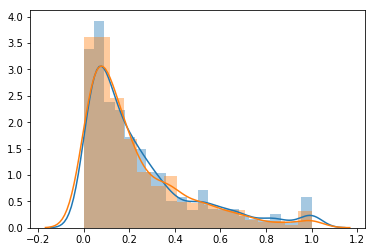

In [31]:
sns.distplot(y_train)
sns.distplot(y_test)

In [32]:
## распределения накладываются, это хорошо
## значит наши целевые значения распределены одинаково

In [33]:
lr = linear_model.LinearRegression()

In [34]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

X_train - всегда должна быть матрица (даже если 1 столбец)
y_train - всегда должен быть вектор

In [35]:
# copy_X=True - делает глубокую копию, для экономии памяти можно использовать True

In [36]:
lr.coef_

array([ 6.21628904e-02,  3.39704112e-03,  2.03897088e-01, -6.60520402e-02,
       -4.22206903e-02, -1.30372970e-02,  4.75381796e-02, -2.37862163e-01,
        2.54215894e-04,  7.20966856e-02, -2.15453488e-01,  4.59015715e-02,
       -4.80280459e-02, -1.71188144e-01,  4.64266990e-02, -2.29978526e-01,
        4.94477572e-02, -6.23769582e-02, -6.34376985e-02,  2.35455956e-01,
        2.08348993e-01, -4.41320833e-01, -1.23750283e-02, -3.18566222e-02,
        3.45880746e-02,  5.83329222e-02,  2.54735235e-01, -1.90211524e-01,
       -1.93650781e-01,  1.29209054e-01,  5.19451631e-03, -5.34032036e-02,
        1.78913978e-01, -7.25125875e-02, -1.45326510e-02,  8.81224991e-02,
        1.35810071e-01,  4.47299883e-01,  1.96629061e-01,  2.07592334e-01,
       -5.48978996e-01,  5.36452459e-02, -1.68190246e-01, -3.36783086e-02,
       -1.48675480e-01, -3.00492545e-02,  3.65004087e-02, -1.71874511e-01,
       -2.80914281e-01,  1.13563575e-01, -1.25064969e-01,  1.14270772e-01,
       -1.19180271e-01, -

In [37]:
lr.intercept_

0.6290116928001216

In [38]:
coefs_arr = np.array(sorted(list(zip(df_prep.columns[:-1], lr.coef_)), key=lambda x: -x[1]))

In [39]:
#zip - склеивает 2 массива по вертикали

In [40]:
coefs_arr

array([['PersPerOccupHous', '0.4792327750126245'],
       ['MalePctDivorce', '0.44729988323432923'],
       ['PctHousOwnOcc', '0.4197119234567753'],
       ['PctRecImmig8', '0.36517874776909776'],
       ['MedRent', '0.3200048898652302'],
       ['NumUnderPov', '0.25473523526304676'],
       ['NumStreet', '0.251445175681439'],
       ['medFamInc', '0.23545595582644768'],
       ['perCapInc', '0.20834899317736938'],
       ['FemalePctDiv', '0.20759233364172572'],
       ['racepctblack', '0.2038970876925012'],
       ['PctPersDenseHous', '0.2004916496386952'],
       ['OwnOccHiQuart', '0.1997121790820546'],
       ['MalePctNevMarr', '0.19662906094336863'],
       ['PctEmploy', '0.1789139782813587'],
       ['HousVacant', '0.16370001164378056'],
       ['PctOccupMgmtProf', '0.13581007061127126'],
       ['PctNotHSGrad', '0.12920905357959284'],
       ['PctImmigRecent', '0.11427077179523441'],
       ['PctIlleg', '0.11356357459343178'],
       ['PctRecImmig5', '0.112373076164717'],
       

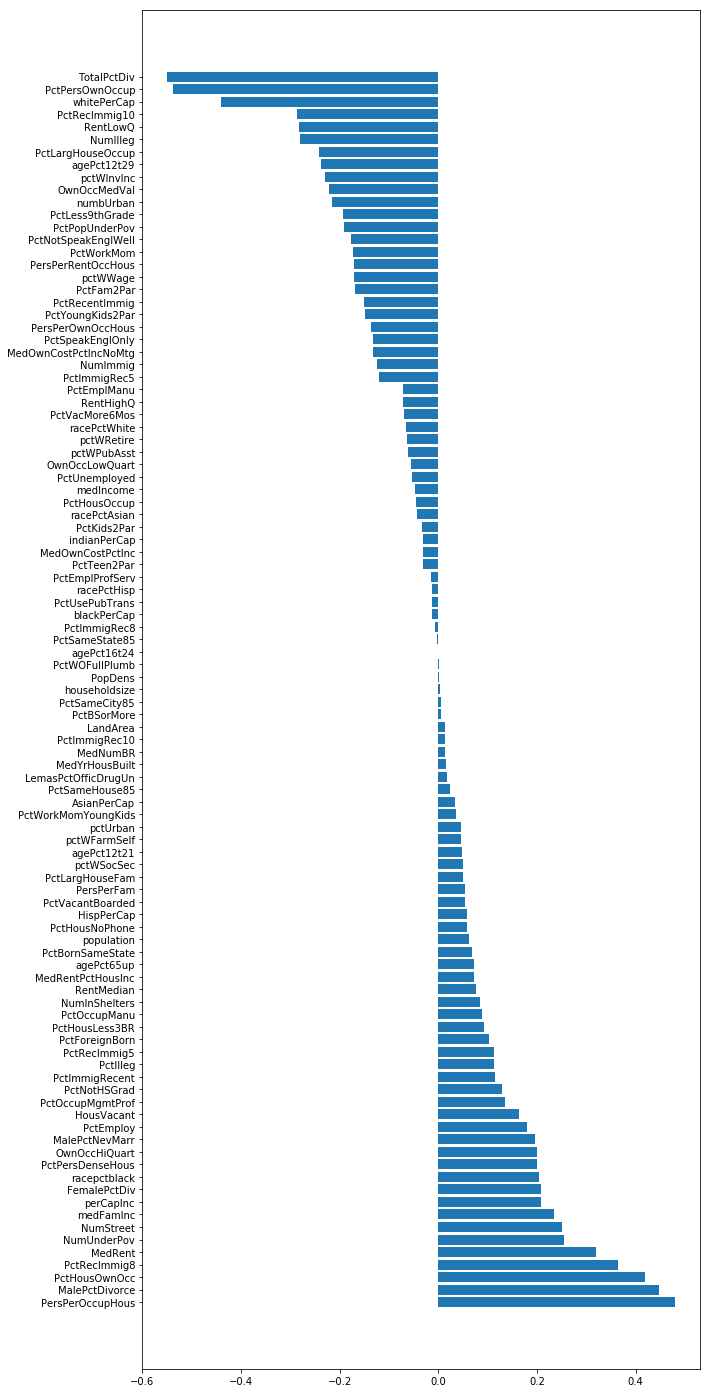

In [41]:
fig = plt.figure(figsize=[10,25])
plt.barh(coefs_arr[:, 0], coefs_arr[:, 1].astype(float))
plt.show()

In [42]:
X_test[0]

array([0.06, 0.46, 0.02, 0.88, 0.2 , 0.2 , 0.36, 0.41, 0.22, 0.34, 0.07,
       1.  , 0.47, 0.6 , 0.12, 0.54, 0.37, 0.34, 0.51, 0.47, 0.42, 0.4 ,
       0.95, 0.21, 0.42, 0.5 , 0.03, 0.17, 0.14, 0.2 , 0.38, 0.29, 0.57,
       0.23, 0.32, 0.27, 0.49, 0.57, 0.28, 0.61, 0.62, 0.46, 0.65, 0.68,
       0.72, 0.55, 0.52, 0.57, 0.01, 0.14, 0.02, 0.25, 0.34, 0.36, 0.44,
       0.11, 0.13, 0.13, 0.15, 0.84, 0.12, 0.19, 0.19, 0.49, 0.51, 0.45,
       0.6 , 0.17, 0.45, 0.5 , 0.06, 0.74, 0.59, 0.12, 0.2 , 0.83, 0.16,
       0.18, 0.36, 0.4 , 0.41, 0.45, 0.49, 0.58, 0.5 , 0.64, 0.66, 0.19,
       0.08, 0.03, 0.19, 0.56, 0.27, 0.16, 0.65, 0.09, 0.12, 0.05, 0.  ])

In [43]:
lr.predict([X_test[0]])

array([0.23358796])

In [44]:
y_test[0]

0.22

### Считаем метрику, чтобы понять, есть ли переобучение

Если разница до 10%, то считаем, что переобучения нет

In [45]:
from sklearn import metrics

In [46]:
predicts_test = lr.predict(X_test)
predicts_train = lr.predict(X_train)

In [47]:
metrics.mean_absolute_error(y_test, predicts_test)

0.0970250716954318

In [48]:
metrics.mean_absolute_error(y_train, predicts_train)

0.09252593902381363

0.09 - то есть на столько преступлений на 100 000 мы ошибаемся. 

random state - параметр означает тип разбиения. Мы его делаем фиксированным,
чтобы для следующего обучения данные взялись те же самые

In [49]:
metrics.mean_squared_error(y_test, predicts_test) # это число уже не имеет физической интерпретации

0.017692614569897368

### Метрика RMSE

In [52]:
np.sqrt(metrics.mean_squared_error(y_test, predicts_test)) # показывает, на сколько в среднем мы отклоняемся. 
# Это 0,13 преступлений.
# смысл в том, что чем больше ошибка, тем больший вклад она вносит.
# если эта метрика сильно отличается от МАЕ, то где-то мы ошибаемся очень сильно.
# если не сильно, то все ок.

0.13301358791453363

### Регуляризация

In [54]:
ridge2 = linear_model.Ridge(alpha=10.0)
ridge2.fit(X_train, y_train)

print('test', metrics.mean_absolute_error(y_test, ridge2.predict(X_test)))
print('train', metrics.mean_absolute_error(y_train, ridge2.predict(X_train)))

test 0.09414193833124201
train 0.09465804900831708


ошибки test  и train  почти совпали, и это очень хорошо! 